In [1]:
import  pandas as pd 
reviewdata=pd.read_csv("train.csv")

In [2]:
reviewdata

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
reviewdata.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [4]:
reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [5]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
count=reviewdata.isnull().sum().sort_values(ascending=False)
percentage=((reviewdata.isnull().sum()/len(reviewdata)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,
keys=['count','percentage'])

print("Count and percentage of missing values for the columns")

Count and percentage of missing values for the columns


In [7]:
missing_data

,count,percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


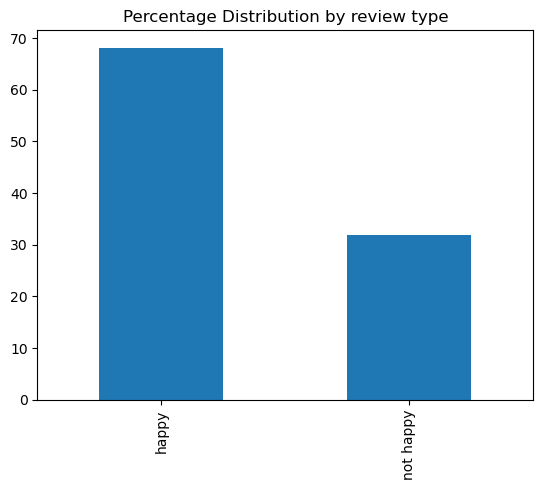

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by review type')
plt.show()

In [9]:
reviewdata.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [20]:
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [21]:
reviewdata['cleaned_description']=pd.DataFrame(reviewdata.Description.apply(cleaned1))
reviewdata.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,...


In [22]:
def text_clean_2(text):
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [23]:
reviewdata['cleaned_description_new']=pd.DataFrame(reviewdata['cleaned_description'].apply(cleaned2))
reviewdata.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [24]:
from sklearn.model_selection import train_test_split

Independent_var=reviewdata.cleaned_description_new
Dependent_var=reviewdata.Is_Response

IV_train,IV_test,DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size=0.1,
                                                     random_state=225)

print('IV_train:',len(IV_train))
print('IV_test:',len(IV_test))
print('DV_train:',len(DV_train))
print('DV_test:',len(DV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf2=LogisticRegression(solver="ibfgs")

from sklearn.pipeline import  Pipeline


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver="lbfgs")

from sklearn.pipeline import Pipeline

model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)


from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

c:\Users\Nilima\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2417,  304],
       [ 154, 1019]], dtype=int64)

In [27]:
from sklearn.metrics import  accuracy_score,precision_score,recall_score

print('Accuracy :',accuracy_score(predictions,DV_test))
print('Precision :',precision_score(predictions,DV_test,average='weighted'))
print('Recall :',recall_score(predictions,DV_test,average='weighted'))


Accuracy : 0.8823831535695943
Precision : 0.8889271415963718
Recall : 0.8823831535695943


In [29]:
example = [" I'm feeling low "]
result=model.predict(example)

print(result)

['not happy']
